In [9]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

## II. Le tri à bulles

Ce tri est réalisé en place. Il vise à faire remonter la valeur la plus grande rencontrée vers la fin de la liste. Ainsi, au premier passage, la plus grande valeur va prendre la dernière position, au second passage, la deuxième plus grand valeur prendra l'avant dernière place et ainsi de suite. On arrive ainsi à trier la liste au bout de n-1 balayages de la liste. **La complexité est donc quadratique**. Il est ainsi très facile à écrire mais peu efficace.

Voici une petite vidéo pour vous donner une idée de l'algorithme.

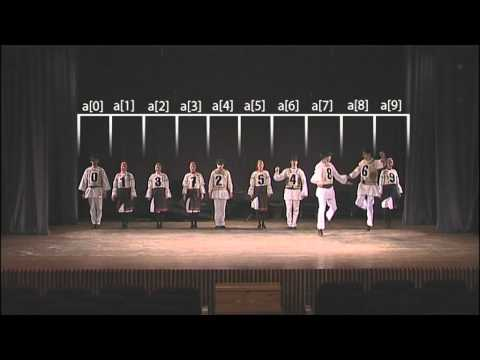

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("lyZQPjUT5B4",width="640px", height="315px")


### Activité à réaliser
1. Proposer une fonction itérative réalisant un tri à bulles
2. Réaliser une étude sur son temps d'exécution
3. Proposer une version récursive du tri à bulles

In [11]:
# 1.
def tri_bulles_iter(L):
    for i in range(len(L)-1):
        for j in range(len(L)-1-i):
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
    return L

In [12]:
L = [0,1,3,7,2,5,4,8,6,9]
tri_bulles_iter(L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
# 2.
from random import randint
def melange(n,p):
    L = [i+1 for i in range(n)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(0,n-1)
        L[a], L[b] = L[b], L[a]
    return L

import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            t = time() -t
            if t < temps or temps == 0:
                temps = t
        y.append(temps)
    plt.plot(x,y,"+")
    plt.show()

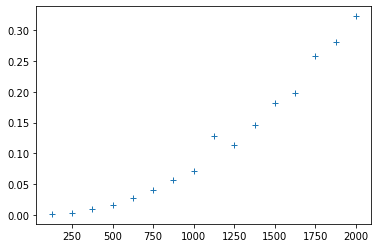

In [14]:
trace(tri_bulles_iter,2000,2000) # complexité quadratique

In [15]:
def chrono(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5.
        y.append(temps)
    return x,y

In [17]:
x,y = chrono(tri_bulles_iter,2000,2000)

1.7500825580781393e-05


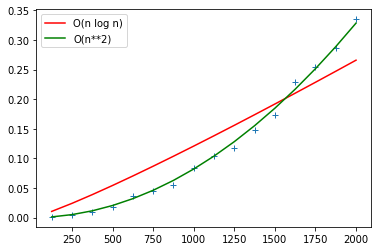

In [18]:
from scipy.optimize import curve_fit
from math import log2
import numpy as np

def f(x,a):
    return a*x*np.log(x)

def g(x,a):
    return a*x**2

params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
print(*params)
plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.legend()
plt.show()

In [19]:
# 3.
def tri_bulles_rec(L):
    if len(L) <= 1:
        return L
    else:
        for i in range(len(L)-1):
            if L[i] > L[i+1]:
                L[i], L[i+1] = L[i+1], L[i]
        return tri_bulles_rec(L[:-1])+L[-1:]

In [21]:
L = melange(10,10)
L

[7, 2, 3, 5, 6, 8, 4, 10, 9, 1]

In [22]:
tri_bulles_rec(L)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

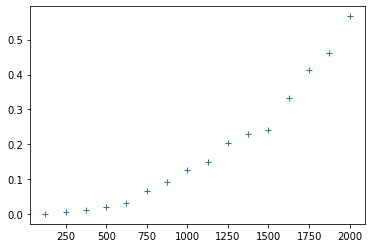

In [23]:
trace(tri_bulles_rec,2000,2000) # complexité quadratique aussi

In [24]:
x,y = chrono(tri_bulles_rec,2000,2000)

2.5330987771529524e-05


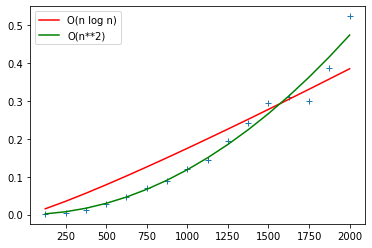

In [25]:
params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
print(*params)
plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.legend()
plt.show()